In [1]:
import sys, os
sys.path.append("..")
import numpy as np
import common as com
import sys as sys
import os as os
import fisher_plot as fsh
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
plots_dir = "/group/hepheno/smsharma/GoFish/plots/"
ini_dir = "/group/hepheno/smsharma/GoFish/notebooks/ini_files/"
label_size = 20

In [3]:
param_och2 = """
#Cosmological parameters
[och2]
#Fiducial value
x= 0.1197
#Increment used for numerical derivatives
dx= 0.001
#Set to 'no' if this parameter should be keep fixed
is_free= yes
onesided=0

"""

param_obh2 = """
[obh2]
x= 0.02222
dx= 0.0001
is_free= yes
onesided=0

"""

param_ok = """
[ok]
x= 0.0
dx= 0.015
is_free= yes
onesided=0

"""

param_hh = """
[hh]
x= 0.69
dx= 0.01
is_free= yes
onesided=0

"""

param_w0 = """
[w0]
x= -1.0
dx= 0.01
is_free= yes
onesided=0

"""

param_wa = """
[wa]
x=0.0
dx=0.05
is_free= yes
onesided=0

"""

param_As = """
[A_s]
x= 2.1955
dx= 0.01
is_free= yes
onesided=0

"""

param_ns = """
[ns]
x= 0.9655
dx= 0.005
is_free= yes
onesided=0

"""

param_tau = """
[tau]
x=0.06
dx=0.02
is_free= yes
onesided = 0

"""

param_rt = """
[rt]
x=0.00
dx=0.005
is_free= no
onesided = 1

"""

param_mnu = """
[mnu]
x=60.
dx=10.
is_free= yes
onesided = 0

"""

param_pan = """
[pan]
x=0.
dx=0.02
is_free= no
onesided = 1

"""

param_lmcb = """
[lmcb]
x=14.08
dx=0.3
is_free= yes
onesided = 0

"""

param_etab = """
[etab]
x=0.5
dx=0.1
is_free= yes
onesided = 0

"""

param_lksb="""
[lksb]
x=1.7404
dx=0.2
is_free= yes
onesided = 0

"""

tracer_cmb_primary_nos4 = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 31.13 31.13
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 200.94 56.9402
#Beam size in units of arcmin in the two ell regimes
beam_amin= 10.0 7.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_primary_cvnos4 = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 2.83 31.13
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 4.0 56.9402
#Beam size in units of arcmin in the two ell regimes
beam_amin= 30.0 7.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_primary_cv = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 2.83 1.0
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 4.0 1.4
#Beam size in units of arcmin in the two ell regimes
beam_amin= 30.0 3.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_primary = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 31.13 1.0
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 150.0 1.4
#Beam size in units of arcmin in the two ell regimes
beam_amin= 10.0 3.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_lensing = """
[Tracer 2]
tracer_name= CMB_exp_lensing
tracer_type= cmb_lensing
#Noise level in temperature in units of uK-arcmin (implicitly scaled by sqrt(2) in polarization)
sigma_t= 1.0
#Beam size in units of arcmin
beam_amin= 3.0
lmin= 30
lmax= 3000
use_tracer= yes

"""

tracer_lensing = """
[Tracer 3]
tracer_name= LSST_gold_sh
tracer_type= gal_shear
bins_file= ../curves_LSST/bins_gold.txt
nz_file= ../curves_LSST/nz_shear_fiducial.txt
abias_file= ../curves_LSST/az_gold_new.txt
rfrac_file= ../curves_LSST/rf_new.txt
sigma_gamma= 0.28
include_m_bias= yes
m_step = 0.005
use_tracer= yes

"""

tracer_clustering_blue = """
[Tracer 4]
tracer_name= LSST_blue_cl
tracer_type= gal_clustering
bins_file= ../curves_LSST/bins_blue.txt
nz_file= ../curves_LSST/nz_blue.txt
bias_file= ../curves_LSST/bz_blue.txt
sbias_file= ../curves_LSST/sz_blue.txt
ebias_file= ../curves_LSST/ez_blue.txt
use_tracer= yes

"""

tracer_clustering_red = """
[Tracer 5]
tracer_name= LSST_red_cl
tracer_type= gal_clustering
bins_file= ../curves_LSST/bins_red.txt
nz_file= ../curves_LSST/nz_red.txt
bias_file= ../curves_LSST/bz_red.txt
sbias_file= ../curves_LSST/sz_red.txt
ebias_file= ../curves_LSST/ez_red.txt
use_tracer= yes

"""

tracer_bao = """
[BAO 1]
# Absolute errors on dV, dA, H
#fname_dv=../curves_DESI/DESI_sigma_dV_1611.txt
fname_da=../curves_DESI/DESI_sigma_dA_1611.txt
fname_hh=../curves_DESI/DESI_sigma_H_1611.txt
#use_relative_errors = yes

"""

class_params = """
[CLASS parameters]
lmax_cmb= 5000
lmax_lss= 5000
lmin_limber= 200
include_alignment= yes
include_rsd= yes
include_magnification= no
include_gr_vel= no
include_gr_pot= no
exec_path=./run_class.sh
use_nonlinear= yes
use_baryons= yes
f_sky= 0.4

"""

output_params = """
[Output parameters]
output_dir= ../outputs_LSST_DESI_lmax5000_IAFix/
output_spectra= run
output_fisher= Fisher

[Behaviour parameters]
model= wCDM
save_cl_files= yes
save_param_files= yes

"""

In [4]:
def get_ini(setup = "fid", desi=False, shear=True, red=False, blue=True, ok=True, w=True, m_bias=True, vary_baryons=True, photoz=True, shear_lmax5000=True, IA_marg=True, sigma_t=1.0):
    """ Get param.ini file for a given spec as defined in the args
    """
    
    param_ini = (param_och2 + param_obh2 + param_ok +
        param_hh + param_w0 + param_wa + 
        param_As + param_ns + param_tau + 
        param_rt + param_mnu + param_pan 
        )
    
    param_ini += (param_lmcb + param_etab + param_lksb).replace("is_free= yes", "is_free= yes" if vary_baryons else "is_free= no")

    tcl = tracer_cmb_lensing.replace("sigma_t= 1.0", "sigma_t= " +str(sigma_t))
    
    
    if setup == "fid":
        tracers_ini = tcl + tracer_cmb_primary
    elif setup == "nos4":
        tracers_ini = tcl.replace("use_tracer= yes", "use_tracer= no") + tracer_cmb_primary_nos4
    elif setup == "cv":
        tracers_ini = tcl + tracer_cmb_primary_cv
    elif setup == "cvnos4":
        tracers_ini = tcl.replace("use_tracer= yes", "use_tracer= no") + tracer_cmb_primary_cvnos4
    elif setup == "nocmb":
        tracers_ini = tcl.replace("use_tracer= yes", "use_tracer= no") + tracer_cmb_primary_nos4.replace("use_tracer= yes", "use_tracer= no")


    if desi: tracers_ini += tracer_bao
    tracers_ini += tracer_lensing.replace("use_tracer= yes", "use_tracer= yes" if shear else "use_tracer= no").replace("include_m_bias= yes", "include_m_bias= yes" if m_bias else "include_m_bias= no").replace("bins_gold.txt", "bins_gold.txt" if shear_lmax5000 else "bins_gold_lmax2000.txt").replace("az_gold_new.txt", "az_gold_new.txt" if IA_marg else "az_gold_new_nomarg.txt")
    tracers_ini += tracer_clustering_red.replace("use_tracer= yes", "use_tracer= yes" if red else "use_tracer= no").replace("bins_red.txt", "bins_red.txt" if photoz else "bins_red_nomarg.txt")
    tracers_ini += tracer_clustering_blue.replace("use_tracer= yes", "use_tracer= yes" if blue else "use_tracer= no").replace("bins_blue.txt", "bins_blue.txt" if photoz else "bins_blue_nomarg.txt")
    tracers_ini += param_ok.replace("is_free= yes", "is_free= yes" if ok else "is_free= no")
    tracers_ini += (param_w0 + param_wa).replace("is_free= yes", "is_free= yes" if w else "is_free= no")
    

    ini_file = param_ini + tracers_ini + class_params + output_params.replace("Fisher", "FisherDellaIAFixedBaryons_"+str(setup)+str(desi)+str(shear)+str(red)+str(blue)+str(ok)+str(w)+str(m_bias)+str(vary_baryons)+str(photoz) +str(shear_lmax5000)+str(IA_marg)+str(sigma_t))
    ini_name = ini_dir + "paramFixed_"+str(setup)+str(desi)+str(shear)+str(red)+str(blue)+str(ok)+str(w)+str(m_bias)+str(vary_baryons) +str(photoz) +str(shear_lmax5000)+str(IA_marg)+str(sigma_t)+".ini"    

   
    return ini_file, ini_name

## Figure 4: Relative improvement with different CMB lensing noise levels

In [38]:
parlist = []
parnames = []

st = [1.0, 2, 4, 7, 10]
for sigma_t in st:


    fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True, sigma_t=sigma_t)
    parlist.append(fname)
    parnames.append("Marginalize over baryons")
    f=open(fname, "w")
    f.write(fstr)
    f.close()

In [39]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []



for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
            pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shea

    * bias_LSST_blue_cl_node3 : 2.047
    * bias_LSST_blue_cl_node4 : 2.557
    * bias_LSST_blue_cl_node5 : 3.188
    * sphz_LSST_blue_cl_node0 : 0.054
    * sphz_LSST_blue_cl_node1 : 0.063
    * sphz_LSST_blue_cl_node2 : 0.073
    * sphz_LSST_blue_cl_node3 : 0.085
    * sphz_LSST_blue_cl_node4 : 0.099
    * sphz_LSST_blue_cl_node5 : 0.115
    * sphz_LSST_blue_cl_node6 : 0.133
    * sphz_LSST_blue_cl_node7 : 0.155
    * sphz_LSST_blue_cl_node8 : 0.180
    * bphz_LSST_blue_cl_node0 : 0.000
    * bphz_LSST_blue_cl_node1 : 0.000
    * bphz_LSST_blue_cl_node2 : 0.000
    * bphz_LSST_blue_cl_node3 : 0.000
    * bphz_LSST_blue_cl_node4 : 0.000
    * bphz_LSST_blue_cl_node5 : 0.000
    * bphz_LSST_blue_cl_node6 : 0.000
    * bphz_LSST_blue_cl_node7 : 0.000
    * bphz_LSST_blue_cl_node8 : 0.000
    * 9 multiplicative bias parameters
Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 6.0115E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.3692E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 3.5280E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.9236E-03(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0137E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 1.8890E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.7459E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3986E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.2219E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.3072E-02(m) +- 5.4281E-03(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.6431E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.8120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.5233E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2312E+00(m) +- 1.0511E+00(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.1223E-02(m) +- 4.2309E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.1000E-02(m) +- 3

Fisher forecast :
 - tau = 6.0000E-02 +- 6.1248E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.6773E+01(m) +- 1.3708E+00(f)
 - och2 = 1.1970E-01 +- 3.6493E-04(m) +- 3.4814E-05(f)
 - hh = 6.9000E-01 +- 2.3898E-03(m) +- 1.5975E-04(f)
 - obh2 = 2.2220E-02 +- 3.0541E-05(m) +- 1.2128E-05(f)
 - lksb = 1.7404E+00 +- 1.9292E-01(m) +- 6.9745E-02(f)
 - ns = 9.6550E-01 +- 1.8027E-03(m) +- 4.1092E-04(f)
 - A_s = 2.1955E+00 +- 2.4508E-02(m) +- 1.0379E-03(f)
 - lmcb = 1.4080E+01 +- 6.7284E-02(m) +- 1.1588E-02(f)
 - etab = 5.0000E-01 +- 2.4175E-02(m) +- 5.6952E-03(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.7000E-01(m) +- 1.1616E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.8493E-01(m) +- 1.4254E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.5963E-01(m) +- 2.9334E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2676E+00(m) +- 1.0760E+00(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.1994E-02(m) +- 4.2330E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.2204E-02(m) +- 3.415

In [40]:
mnu_nowok = [doc['mnu'] for doc in dict_test_wok]

In [41]:
parlist = []
parnames = []

for sigma_t in st:

    fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, sigma_t=sigma_t)
    parlist.append(fname)
    parnames.append("Marginalize over baryons")
    f=open(fname, "w")
    f.write(fstr)
    f.close()

In [42]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []



for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue10
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear : lensing_shear, intrinsic_alignment
  - 49 free parameters

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 6.0936E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8504E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.3397E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.3926E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0404E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.2494E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9544E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.4422E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.4087E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.5127E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.9254E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 3.1623E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 1.2361E-01(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0137E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.7279E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2846

Fisher forecast :
 - tau = 6.0000E-02 +- 6.2072E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 3.7542E+01(m) +- 1.3708E+00(f)
 - och2 = 1.1970E-01 +- 4.5167E-04(m) +- 3.4814E-05(f)
 - hh = 6.9000E-01 +- 1.4062E-02(m) +- 1.5975E-04(f)
 - obh2 = 2.2220E-02 +- 3.0847E-05(m) +- 1.2128E-05(f)
 - lksb = 1.7404E+00 +- 2.2943E-01(m) +- 6.9745E-02(f)
 - ns = 9.6550E-01 +- 2.0101E-03(m) +- 4.1092E-04(f)
 - A_s = 2.1955E+00 +- 2.4954E-02(m) +- 1.0379E-03(f)
 - lmcb = 1.4080E+01 +- 7.0923E-02(m) +- 1.1588E-02(f)
 - etab = 5.0000E-01 +- 2.6238E-02(m) +- 5.6952E-03(f)
 - ok = 0.0000E+00 +- 4.9433E-04(m) +- 3.6952E-05(f)
 - wa = 0.0000E+00 +- 3.2747E-01(m) +- 1.8181E-03(f)
 - w0 = -1.0000E+00 +- 1.2580E-01(m) +- 5.0111E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0254E-01(m) +- 1.1616E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0418E-01(m) +- 1.4254E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.8074E-01(m) +- 2.9334E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.3163E+00

In [43]:
mnu = [doc['mnu'] for doc in dict_test_wok]
w0 = [doc['w0'] for doc in dict_test_wok]
wa = [doc['wa'] for doc in dict_test_wok]
ok = [doc['ok'] for doc in dict_test_wok]

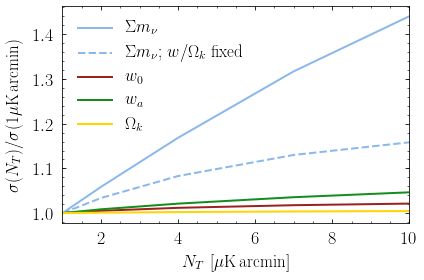

In [44]:
plt.figure(); ax=plt.gca();
ax.plot(st,mnu/mnu[0],'-',lw=2,color='#8BB8EC',label='$\\Sigma m_\\nu$')
ax.plot(st,mnu_nowok/mnu_nowok[0],'--',lw=2,color='#8BB8EC',label='$\\Sigma m_\\nu$; $w/\Omega_k$ fixed')
ax.plot(st, w0/w0[0] ,'-',lw=2,color='#9C2121',label='$w_0$')
ax.plot(st, wa/wa[0] ,'-',lw=2,color='#128D1E',label='$w_a$')
ax.plot(st, ok/ok[0] ,'-',lw=2,color='#FFD500',label='$\\Omega_k$')
ax.set_xlabel('$N_T\\,\\,[\\mu{\\rm K\\,arcmin}]$',fontsize=17)
ax.set_ylabel('$\\sigma(N_T)/\\sigma(1\\mu{\\rm K\\,arcmin})$',fontsize=17)
plt.xlim([1.,10])
plt.tight_layout()
plt.legend(loc='upper left',frameon=False,fontsize=17,ncol=1)
plt.savefig(plots_dir+'/mnu_st.pdf',bbox_inches='tight')

# Figure 1: Degradation when including DE and curvature with S4+DESI

In [45]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=False,w=False,m_bias=False, vary_baryons=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=True,w=True,m_bias=False, vary_baryons=False)
parlist.append(fname)
parnames.append("Don't marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [46]:
pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidTrueFalseFalseFalseFalseFalseFalseFalseTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy sh

/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


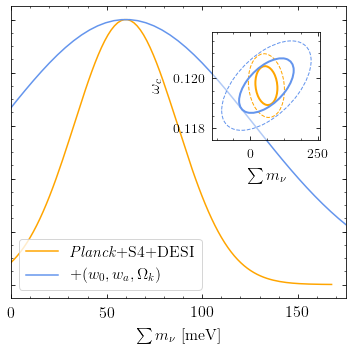

In [47]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)

cool_cols = np.array(["orange","cornflowerblue","lightcoral","goldenrod","orange","grey","chocolate","firebrick"])
mpl.rcParams['xtick.labelsize'] = label_size

labels = ['\emph{Planck}+S4+DESI','$+(w_0,w_a,\\Omega_k)$']

fsh.plot_fisher_single(pars[0].params_fshr,'mnu',[pars[i].fshr for i in range(len(pars))],ax,cool_cols,(len(pars))*[1.5],(len(pars))*["solid"],cool_cols,20,show_title=False,legend=True,labels=labels, unit="[meV]")

ax.set_xlim(0,175)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.set_ticklabels([])
ax.legend(loc='lower left',fancybox=True,fontsize=16)


ax1=plt.axes([0.6, 0.6, .3, .3])
fsh.plot_fisher_two(pars[0].params_fshr,'mnu','och2',[pars[i].fshr for i in range(len(pars))],ax1,len(pars)*["none"],(len(pars))*[2],len(pars)*["solid"],cool_cols,3)
ax1.patch.set_alpha(0.5)

plt.tight_layout()
plt.savefig(plots_dir + "S4wok.pdf")

# Table 2: Fiducial forecasts

In [48]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=False,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=False,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [49]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseFalseFalseFalseFalseFalseTrueTrueTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy she

ValueError: could not broadcast input array from shape (10,10) into shape (19,19)

In [ ]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()



fstr, fname = get_ini(setup="nos4", desi=False,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [ ]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []



for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

In [ ]:
title_str = ['\emph{Planck}+S4','( + DESI BAO)', 'LSST-clustering','LSST-shear','LSST-shear+clust','S4+LSST','CV+S4+LSST']

for title, dict, dict_wok in zip(title_str,dict_test, dict_test_wok):
    print title, '&', int(round(dict['mnu'],0)), '&', int(round(dict_wok['mnu'],0)), '&', round(dict_wok['ok']*1000,2), '&', round(dict_wok['w0'],2), '&', round(dict_wok['wa'],2), '\\\\'

# Table 3: Impact of DESI BAO

In [50]:
parlist = []
parnames = []


fstr, fname = get_ini(setup="nos4", desi=True,shear=False,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [51]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_nos4TrueFalseFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 12 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy she

ValueError: could not broadcast input array from shape (33,33) into shape (42,42)

In [ ]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="nos4", desi=True,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [ ]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

In [ ]:
title_str = ['LSST-clustering','LSST-shear','LSST-shear+clust','S4+LSST','CV+S4+LSST']

for title, dict, dict_wok in zip(title_str,dict_test, dict_test_wok):
    print title, '&', int(round(dict['mnu'],0)), '&', int(round(dict_wok['mnu'],0)), '&', round(dict_wok['ok']*1000,2), '&', round(dict_wok['w0'],2), '&', round(dict_wok['wa'],2), '\\\\'

# Table 4: Impact of CV measurement

In [ ]:
parlist = []
parnames = []


fstr, fname = get_ini(setup="cvnos4", desi=False,shear=False,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cv", desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [52]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_nos4TrueFalseFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 12 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy she

ValueError: could not broadcast input array from shape (33,33) into shape (42,42)

In [ ]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cv",desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [ ]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

In [ ]:
title_str = ['LSST-clustering','LSST-shear','LSST-shear+clust','S4+LSST','CV+S4+LSST']

for title, dict, dict_wok in zip(title_str,dict_test, dict_test_wok):
    print title, '&', int(round(dict['mnu'],0)), '&', int(round(dict_wok['mnu'],0)), '&', round(dict_wok['ok']*1000,2), '&', round(dict_wok['w0'],2), '&', round(dict_wok['wa'],2), '\\\\'

## Tables 2,3,4 addendum: fix $w_0/w_a$

### Fiducal

In [161]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [162]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

In [163]:
dict_test[0]['ok']*1000

0.48665086203801211

In [164]:
dict_test[0]['mnu']

23.758963297781268

### With DESI

In [165]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=True,shear=True,red=False,blue=True,ok=True,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [166]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidTrueTrueFalseTrueTrueFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

In [167]:
dict_test[0]['ok']*1000

0.44143586162529752

In [168]:
dict_test[0]['mnu']

22.084408316310487

### With CV

In [169]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="cv",desi=False,shear=True,red=False,blue=True,ok=True,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [170]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_cvFalseTrueFalseTrueTrueFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

In [171]:
dict_test[0]['ok']*1000

0.48618890114333091

In [172]:
dict_test[0]['mnu']

14.705199447214943

# Figure 2: Main plot: improvements with LSST

In [173]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()



fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [174]:
pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseFalseFalseFalseTrueTrueTrueTrueTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

Fisher forecast :
 - tau = 6.0000E-02 +- 5.9483E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8106E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.2837E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.1020E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0293E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.1481E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9529E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3766E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.3782E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.4337E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.8849E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 2.6100E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 9.9957E-02(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.8572E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.9381E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.6198E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2168E+00

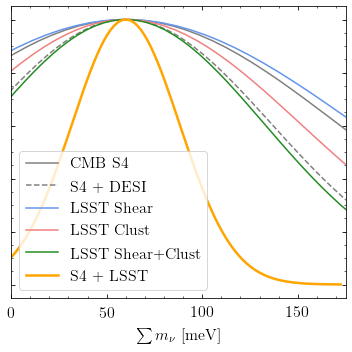

In [175]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)

cool_cols = np.array(["grey","grey","cornflowerblue","lightcoral","forestgreen","orange","grey","chocolate","firebrick"])
# mpl.rcParams['xtick.labelsize'] = label_size

labels = ['CMB S4','S4 + DESI','LSST Shear','LSST Clust','LSST Shear+Clust','S4 + LSST']

fsh.plot_fisher_single(pars[0].params_fshr,'mnu',[pars[i].fshr for i in range(len(pars))],ax,cool_cols,[1.5,1.5,1.5,1.5,1.5,2.5],["solid","dashed","solid","solid","solid","solid"],cool_cols,20,show_title=False,legend=True,labels=labels, unit='[meV]')

ax.set_xlim(0,175)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.set_ticklabels([])
ax.legend(loc='lower left',fancybox=True,fontsize=16)

plt.tight_layout()
plt.savefig(plots_dir + "Complementarity.pdf")

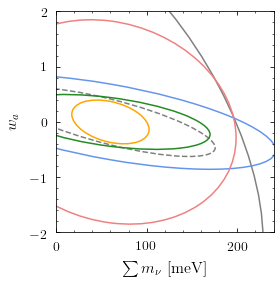

In [176]:
# cool_cols = np.array(["grey","cornflowerblue","lightcoral","forestgreen","orange","firebrick"])

# ax = plt.axes()
fig, ax = plt.subplots(figsize=(4, 4))
fsh.plot_fisher_two(pars[0].params_fshr,"mnu","wa",[pars[i].fshr for i in range(len(pars))],ax,(len(pars))*["none"],(len(pars))*[1.5],
                           ["solid","dashed","solid","solid","solid","solid"],cool_cols,1.8,#[col_idx],
                   units=['[meV]',''], plot_2s=False)
plt.tight_layout()

plt.xlim(0,240)
plt.ylim(-2,2)

plt.savefig(plots_dir + "wamnu.pdf")

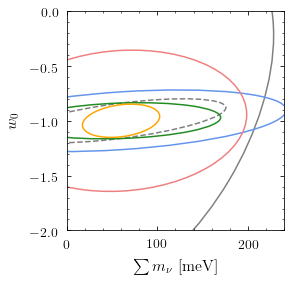

In [177]:
# cool_cols = np.array(["grey","cornflowerblue","lightcoral","forestgreen","orange","firebrick"])

# ax = plt.axes()
fig, ax = plt.subplots(figsize=(4, 4))
fsh.plot_fisher_two(pars[0].params_fshr,"mnu","w0",[pars[i].fshr for i in range(len(pars))],ax,(len(pars))*["none"],(len(pars))*[1.5],
                           ["solid","dashed","solid","solid","solid","solid"],cool_cols,1.8,#[col_idx],
                   units=['[meV]',''], plot_2s=False)
plt.tight_layout()
plt.xlim(0,240)
plt.ylim(-2,0)



plt.savefig(plots_dir + "w0mnu.pdf")

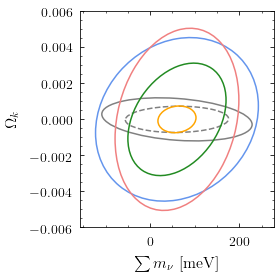

In [178]:
# cool_cols = np.array(["grey","cornflowerblue","lightcoral","forestgreen","orange","firebrick"])

# ax = plt.axes()
fig, ax = plt.subplots(figsize=(4, 4))
fsh.plot_fisher_two(pars[0].params_fshr,"mnu","ok",[pars[i].fshr for i in range(len(pars))],ax,(len(pars))*["none"],(len(pars))*[1.5],
                           ["solid","dashed","solid","solid","solid","solid"],cool_cols,1.8,#[col_idx],
                   units=['[meV]',''], plot_2s=False)
plt.tight_layout()
# plt.xlim(0,240)
# plt.ylim(-2,0)



plt.savefig(plots_dir + "okmnu.pdf")

# Figure 6: Multiplication bias self-calibration

In [179]:
class Dummy():
    def __init__(self):
        pass

In [180]:
new_pars = [Dummy() for _ in range(pars[0].npar_mbias)]
for i in range(len(new_pars)):
    new_pars[i].name = "m"+str(i)
    new_pars[i].do_plot = True
    new_pars[i].val = 0.
    new_pars[i].label = "$m_"+str(i)+"$"

In [181]:
m_params_to_plot = ["m"+str(i) for i in range(9)]

In [182]:
pars = np.array(pars)

In [183]:
zbins = np.loadtxt("../curves_LSST/bins_gold.txt", unpack=True)
z0 = zbins[0]
zf = zbins[1]
(z0+zf)/2
label1 = [str(np.round(i,3))[:4] for i in (z0+zf)/2]

In [184]:
mbias_list = [dict_test_wok[-1]['m'+str(i)] for i in range(9)]
mbias_fid = [0 for i in range(9)]
x = [i for i in range(9)]
x1 = np.arange(-0.5,9.,1)
label2 = ["$m_"+str(i)+"$" for i in range(9)]

In [185]:
label = [j for i,j in zip(label1, label2)]

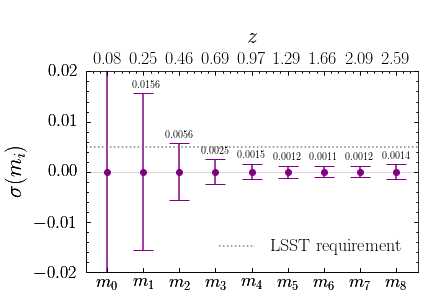

In [186]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

ax = host_subplot(111, axes_class=AA.Axes)

ax.errorbar(x, mbias_fid, yerr=mbias_list, fmt='o', capsize=10, color='purple')
ax.set_ylim(-0.02,0.02)
ax.set_xticks(x, label);
ax.set_ylabel("$\sigma(m_i)$")
ax.axhline(0, color='purple', alpha=0.2, lw=1)
# plt.yscale("log")

ax2 = ax.twin()  

ax.set_xticks(x)
ax.set_xticklabels(label)

ax2.set_xticks(np.array(x1)[::2])
ax2.set_xticklabels([str(np.abs(np.round(i,3)))[:4] for i in np.array(list(z0)+[zf[-1]])[::2]])

ax2.set_xticks(x)
ax2.set_xticklabels(label1)


ax2.axis["top"].major_ticklabels.set_visible(True)
ax2.axis["right"].major_ticklabels.set_visible(False)

ax.tick_params(axis='x', pad=2000)

ax2.set_xlabel("$z$")

for i in range(1,2):
    plt.text(i-0.3,mbias_list[i]+0.001, np.round(mbias_list[i],4), rotation=0)



for i in range(2,len(mbias_list)):
    plt.text(i-0.4,mbias_list[i]+0.001, np.round(mbias_list[i],4), rotation=0)
    
plt.axhline(0.005, ls='dotted', color='grey', label="LSST requirement")

plt.xlim(-0.6,8.6)
plt.tight_layout()
plt.legend(frameon=False, loc='lower right')
plt.savefig(plots_dir + "MultBiasS4_v2.pdf")

# Figure 5: Effect of systematics

In [5]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, shear_lmax5000=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=True,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, photoz=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=False, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, IA_marg=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()



In [6]:
dict_test_wok = []

pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueFalseTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

Fisher forecast :
 - tau = 6.0000E-02 +- 5.9483E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8106E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.2837E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.1020E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0293E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.1481E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9529E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3766E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.3782E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.4337E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.8849E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 2.6100E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 9.9957E-02(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.8572E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.9381E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.6198E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2168E+00

../tracers.py:679: RuntimeWarning: invalid value encountered in divide
  cos2phi = np.nan_to_num(2 * ((Ldotl1 - l**2) / (l * l2))**2 - 1.)
../tracers.py:701: RuntimeWarning: invalid value encountered in divide
  cosphi = np.nan_to_num((Ldotl1 - l**2) / (l * l2))
../tracers.py:718: RuntimeWarning: invalid value encountered in divide
  cos2phi = np.nan_to_num(2. * ((Ldotl1 - l**2) / (l * l2))**2 - 1.)
../tracers.py:750: RuntimeWarning: invalid value encountered in divide
  cosphi =np.nan_to_num( (Ldotl1 - l**2) / (l * l2) )


   LSST_gold_sh


/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


   LSST_blue_cl
0 14931216.1922 -0.0 0.162162 0.054054
1 49109007.0275 0.162162 0.350621 0.06282
2 79018539.4946 0.350621 0.56964 0.073007
3 92296654.9546 0.56964 0.824177 0.084845


/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


4 89279140.6194 0.824177 1.119989 0.098604
5 75327183.8974 1.119989 1.463771 0.114594
6 47554508.2141 1.463771 1.863302 0.133177
7 19267797.5052 1.863302 2.327621 0.154773
8 3886250.59716 2.327621 2.867235 0.179871
 
 
Prior is 0.0 on tau
Prior is 0.0 on mnu
Prior is 0.0 on och2
Prior is 0.0 on hh
Prior is 0.0 on obh2
Prior is 0.0 on lksb
Prior is 0.0 on ns
Prior is 0.0 on A_s
Prior is 0.0 on lmcb
Prior is 0.0 on etab
Prior is 0.0 on ok
Prior is 0.0 on wa
Prior is 0.0 on w0
Prior is 0.0 on abias_LSST_gold_sh_node1
Prior is 0.0 on abias_LSST_gold_sh_node2
Prior is 0.0 on abias_LSST_gold_sh_node3
Prior is 0.0 on abias_LSST_gold_sh_node4
Prior is 0.0 on bias_LSST_blue_cl_node1
Prior is 0.0 on bias_LSST_blue_cl_node2
Prior is 0.0 on bias_LSST_blue_cl_node3
Prior is 0.0 on bias_LSST_blue_cl_node4
Prior is 0.0 on bias_LSST_blue_cl_node5
Prior is 0.0 on sphz_LSST_blue_cl_node0
Prior is 0.0 on sphz_LSST_blue_cl_node1
Prior is 0.0 on sphz_LSST_blue_cl_node2
Prior is 0.0 on sphz_LSST_blue_cl_nod

5 2064841.3261 0.34998 0.433484 0.027835
6 2865354.93141 0.433484 0.522153 0.029556
7 3704790.65112 0.522153 0.616307 0.031385
8 4467181.19403 0.616307 0.716285 0.033326
9 4969107.43958 0.716285 0.822447 0.035387
10 4959260.90731 0.822447 0.935176 0.037576
11 4198144.10961 0.935176 1.054877 0.039901
12 2726849.90098 1.054877 1.181983 0.042369
13 1168583.06499 1.181983 1.316951 0.044989
14 274968.734453 1.316951 1.460268 0.047772
 
 
Prior is 0.0 on tau
Prior is 0.0 on mnu
Prior is 0.0 on och2
Prior is 0.0 on hh
Prior is 0.0 on obh2
Prior is 0.0 on lksb
Prior is 0.0 on ns
Prior is 0.0 on A_s
Prior is 0.0 on lmcb
Prior is 0.0 on etab
Prior is 0.0 on ok
Prior is 0.0 on wa
Prior is 0.0 on w0
Prior is 0.0 on abias_LSST_gold_sh_node1
Prior is 0.0 on abias_LSST_gold_sh_node2
Prior is 0.0 on abias_LSST_gold_sh_node3
Prior is 0.0 on abias_LSST_gold_sh_node4
Prior is 0.0 on bias_LSST_blue_cl_node1
Prior is 0.0 on bias_LSST_blue_cl_node2
Prior is 0.0 on bias_LSST_blue_cl_node3
Prior is 0.0 on bia

Deriv for tau
Deriv for mnu
Deriv for och2
Deriv for hh
Deriv for obh2
Deriv for lksb
Deriv for ns
Deriv for A_s
Deriv for lmcb
Deriv for etab
Deriv for ok
Deriv for wa
Deriv for w0
Deriv for abias_LSST_gold_sh_node1
Deriv for abias_LSST_gold_sh_node2
Deriv for abias_LSST_gold_sh_node3
Deriv for abias_LSST_gold_sh_node4
Deriv for bias_LSST_blue_cl_node1
Deriv for bias_LSST_blue_cl_node2
Deriv for bias_LSST_blue_cl_node3
Deriv for bias_LSST_blue_cl_node4
Deriv for bias_LSST_blue_cl_node5
Deriv for m0
Deriv for m1
Deriv for m2
Deriv for m3
Deriv for m4
Deriv for m5
Deriv for m6
Deriv for m7
Deriv for m8
<> Computing relevant noise power spectra
   CMB_exp
   CMB_exp_lensing
   LSST_gold_sh
   LSST_blue_cl
0 14931216.1922 -0.0 0.162162 0.054054
1 49109007.0275 0.162162 0.350621 0.06282
2 79018539.4946 0.350621 0.56964 0.073007
3 92296654.9546 0.56964 0.824177 0.084845
4 89279140.6194 0.824177 1.119989 0.098604
5 75327183.8974 1.119989 1.463771 0.114594
6 47554508.2141 1.463771 1.863302 0.

Deriv for tau
Deriv for mnu
Deriv for och2
Deriv for hh
Deriv for obh2
Deriv for lksb
Deriv for ns
Deriv for A_s
Deriv for lmcb
Deriv for etab
Deriv for ok
Deriv for wa
Deriv for w0
Deriv for abias_LSST_gold_sh_node1
Deriv for abias_LSST_gold_sh_node2
Deriv for abias_LSST_gold_sh_node3
Deriv for abias_LSST_gold_sh_node4
Deriv for bias_LSST_blue_cl_node1
Deriv for bias_LSST_blue_cl_node2
Deriv for bias_LSST_blue_cl_node3
Deriv for bias_LSST_blue_cl_node4
Deriv for bias_LSST_blue_cl_node5
Deriv for sphz_LSST_blue_cl_node0
Deriv for sphz_LSST_blue_cl_node1
Deriv for sphz_LSST_blue_cl_node2
Deriv for sphz_LSST_blue_cl_node3
Deriv for sphz_LSST_blue_cl_node4
Deriv for sphz_LSST_blue_cl_node5
Deriv for sphz_LSST_blue_cl_node6
Deriv for sphz_LSST_blue_cl_node7
Deriv for sphz_LSST_blue_cl_node8
Deriv for bphz_LSST_blue_cl_node0
Deriv for bphz_LSST_blue_cl_node1
Deriv for bphz_LSST_blue_cl_node2
Deriv for bphz_LSST_blue_cl_node3
Deriv for bphz_LSST_blue_cl_node4
Deriv for bphz_LSST_blue_cl_node

Fisher forecast :
 - tau = 6.0000E-02 +- 5.9252E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.7876E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.2568E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 8.9062E-03(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0286E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.0784E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9484E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3682E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.3610E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.3824E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.8821E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 2.2493E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 8.3889E-02(m) +- 4.9891E-04(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.1180E-02(m) +- 4.2309E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.0911E-02(m) +- 3.4053E-03(f)
 - bias_LSST_blue_cl_node3 = 2.0465E+00 +- 1.2383E-02(m) +- 3.7305E-03(f)
 - bias_LSST_blue_cl_node4 = 2.5575E+00 +- 1.5476E-02(m) 

In [7]:
yticks = ["Fiducial", "Shear $\ell_\mathrm{max}= 2000", "Red sample", "No photo-$z$ marg.", "No baryon marg.", "No $m$-bias","No IA marg."]

RuntimeError: LaTeX was not able to process the following string:
'Shear $\\\\ell_\\\\mathrm{max}= 2000'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.1415926-2.5-1.40.14 (TeX Live 2013)
 restricted \write18 enabled.
entering extended mode
(./688f60139037bbcaf0eebf3c9d3839ec.tex
LaTeX2e <2011/06/27>
Babel <v3.8m> and hyphenation patterns for english, dumylang, nohyphenation, lo
aded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 688f60139037bbcaf0eebf3c9d3839ec.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.12 ...{\rmfamily Shear $\ell_\mathrm{max}= 2000}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./688f60139037bbcaf0eebf3c9d3839ec.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on 688f60139037bbcaf0eebf3c9d3839ec.dvi (1 page, 360 bytes).
Transcript written on 688f60139037bbcaf0eebf3c9d3839ec.log.


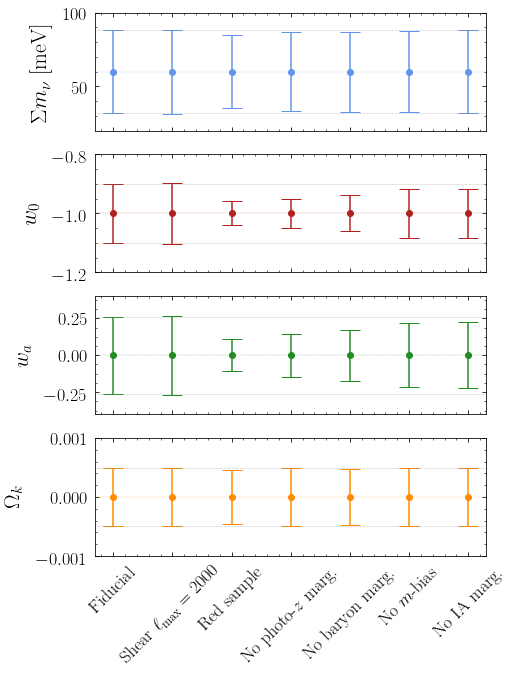

In [8]:
# Simple data to display in various forms
mnu_fid =  [60 for i in range(len(dict_test_wok))]
w0_fid =  [-1 for i in range(len(dict_test_wok))]
wa_fid =  [0 for i in range(len(dict_test_wok))]
ok_fid =  [0 for i in range(len(dict_test_wok))]


x = range(len(dict_test_wok))

mnu_sys = [dict_test_wok[i]['mnu'] for i in range(len(dict_test_wok))]
w0_sys = [dict_test_wok[i]['w0'] for i in range(len(dict_test_wok))]
wa_sys = [dict_test_wok[i]['wa'] for i in range(len(dict_test_wok))]
ok_sys = [dict_test_wok[i]['ok'] for i in range(len(dict_test_wok))]




# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False,figsize=(7,10))
ax1.errorbar(x, mnu_fid, yerr=mnu_sys, fmt='o', capsize=10)
ax1.set_ylim(60-40,60+40)
# ax1.set_title('Systematics')
ax1.set_ylabel("$\Sigma m_\\nu$ [meV]")
ax1.axhline(60, color='cornflowerblue', lw=0.2, ls='--')
ax1.axhline(mnu_fid[0]+mnu_sys[0], color='grey', lw=0.5, ls='dotted')
ax1.axhline(mnu_fid[0]-mnu_sys[0], color='grey', lw=0.5, ls='dotted')




ax2.errorbar(x, w0_fid, yerr=w0_sys, fmt='o', color='firebrick', capsize=10)
ax2.set_ylim(-1-0.2,-1+0.2)
ax2.set_ylabel("$w_0$")
ax2.axhline(-1, color='firebrick', lw=0.2, ls='--')
ax2.axhline(w0_fid[0]+w0_sys[0], color='grey', lw=0.5, ls='dotted')
ax2.axhline(w0_fid[0]-w0_sys[0], color='grey', lw=0.5, ls='dotted')


ax3.errorbar(x, wa_fid, yerr=wa_sys, fmt='o', color='forestgreen', capsize=10)
ax3.set_ylim(0-0.4,0+0.4)
ax3.set_ylabel("$w_a$")
ax3.axhline(0, color='forestgreen', lw=0.2, ls='--')
ax3.axhline(wa_fid[0]+wa_sys[0], color='grey', lw=0.5, ls='dotted')
ax3.axhline(wa_fid[0]-wa_sys[0], color='grey', lw=0.5, ls='dotted')




ax4.errorbar(x, ok_fid, yerr=ok_sys, fmt='o', color='darkorange', capsize=10)
ax4.set_ylim(0-0.001,0+0.001)
ax4.set_ylabel("$\Omega_k$")
ax4.axhline(0, color='darkorange', lw=0.2, ls='--')
ax4.axhline(ok_fid[0]+ok_sys[0], color='grey', lw=0.5, ls='dotted')
ax4.axhline(ok_fid[0]-ok_sys[0], color='grey', lw=0.5, ls='dotted')




ax4.set_xticks(x)
ax4.set_xticklabels(yticks, rotation=45)

f.subplots_adjust(hspace=.2)

plt.tight_layout()
plt.savefig(plots_dir + "systematics.pdf")

## Check of optical depth and $\tau$

In [16]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()



In [17]:
pars=[com.ParamRun(parname) for parname in parlist]

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixed_nos4FalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 21 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear : lens

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 8.8816E-03(m) +- 6.8071E-04(f)
 - mnu = 6.0000E+01 +- 6.7745E+01(m) +- 2.0795E+00(f)
 - och2 = 1.1970E-01 +- 1.1954E-03(m) +- 5.4050E-05(f)
 - hh = 6.9000E-01 +- 1.0760E-02(m) +- 4.2916E-04(f)
 - obh2 = 2.2220E-02 +- 1.4745E-04(m) +- 5.0680E-05(f)
 - ns = 9.6550E-01 +- 3.8223E-03(m) +- 7.1407E-04(f)
 - A_s = 2.1955E+00 +- 3.6742E-02(m) +- 1.6701E-03(f)
 - lmcb = 1.4080E+01 +- 6.4517E-02(m) +- 1.1654E-02(f)
 - etab = 5.0000E-01 +- 2.2616E-02(m) +- 5.7579E-03(f)
 - ok = 0.0000E+00 +- 2.0501E-03(m) +- 1.7219E-04(f)
 - wa = 0.0000E+00 +- 2.7297E-01(m) +- 4.5957E-03(f)
 - w0 = -1.0000E+00 +- 9.3742E-02(m) +- 1.3056E-03(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.8720E-01(m) +- 1.1634E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.9719E-01(m) +- 1.4329E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.7939E-01(m) +- 2.9580E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2587E+00(m) +- 1.0856E+00(f)
 - bias_LSST_blue_cl_node1 = 1

In [18]:
parnames = ['LSST + Planck','LSST + Planck, CV']
cool_cols = np.array(["orange","cornflowerblue","lightcoral","goldenrod","orange","grey","chocolate","firebrick"])

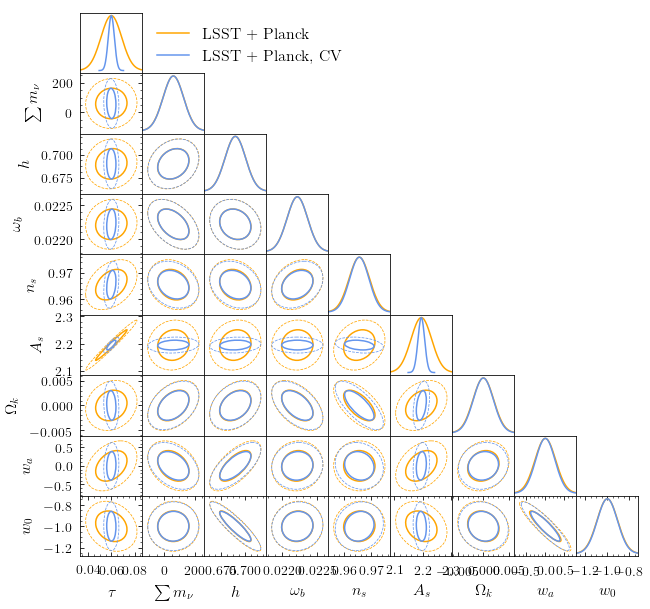

In [19]:
fsh.plot_fisher_all(pars[0].params_fshr,[pars[i].fshr for i in range(len(pars))],len(pars)*["none"],(len(pars))*[1.5],
                           (len(pars))*["solid"],cool_cols,#[col_idx],
                    parnames,3.,
                           "ComplementarityTriangleTest.pdf",["mnu","w0","wa","ok","tau","obh2","A_s","ns","hh"],(10,10),True,False, 2)
# plt.savefig("ComplementarityTriangle.pdf")